# 星火 2023 预习题目

⛔️ 内部资料，严禁转发

可通过[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)等来源查询并学习包括符号意义、API使用方法等信息。

1-4 的题目最好在正式参与星火活动前完成，有余力这也可以尝试选做题。

## 1 环境配置

配置一个支持 Python 的环境和相应的 Python 软件包，使得至少可以跑通如下代码：

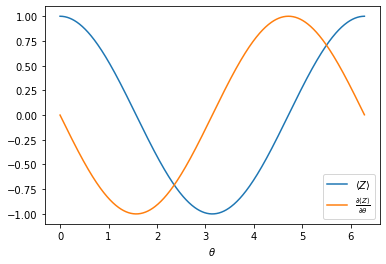

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tensorcircuit as tc

K = tc.set_backend("tensorflow")


@K.jit
def exp_z(param):
    c = tc.Circuit(1)
    c.rx(0, theta=param)
    return K.real(c.expectation_ps(z=[0]))


grad_z = K.grad(exp_z)

params = K.convert_to_tensor(np.arange(0, 2 * np.pi, 0.01))

plt.plot(params, [exp_z(param) for param in params], label=r"$\langle Z\rangle$")
plt.plot(
    params,
    [grad_z(param) for param in params],
    label=r"$\frac{\partial \langle Z\rangle}{\partial \theta}$",
)
plt.legend()
plt.xlabel(r"$\theta$")
plt.show()

## 2 向量和矩阵

### 2-1 旋转矩阵

考虑初始向量 $ v=(1, 0) $ ，给定二维矩阵 $$R(\theta) = \begin{pmatrix} \cos\theta &\sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix}$$，
利用 Numpy 程序实现矩阵乘向量的计算 $v'=R(\theta)v$。通过可视化找到这一向量变化的几何意义。

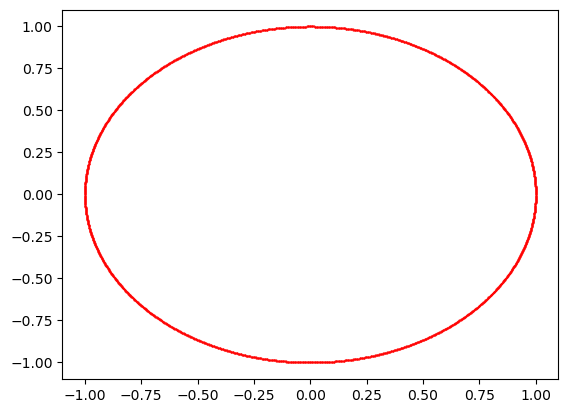

In [45]:
import numpy as np
import matplotlib.pyplot as plt
def rotate(x,y,a):
    v = np.array([x,y])
    c = np.cos(a)
    s = np.sin(a)
    R_a = [[c,s],[-s,c]]
    v_new = R_a@v
    return v_new
for i in range(2000):
    v_new = rotate(1,0,0.001*i*np.pi)
    x = v_new[0] 
    y = v_new[1]
    plt.plot(x,y,color="red",marker=".",markersize=1)


输出图像\
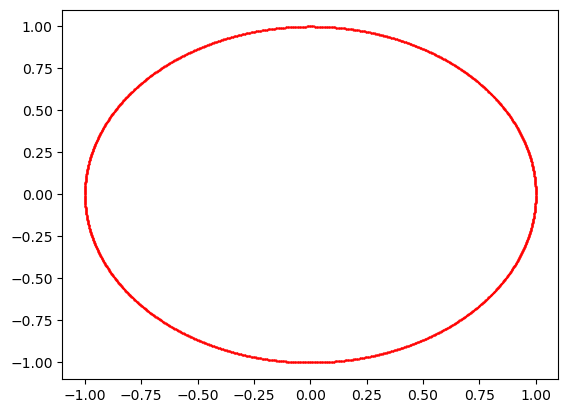

### 2-2 矩阵指数

理解矩阵指数的含义，程序实现 $e^{i \hat P}$, $\hat{P}=\sigma_x, \sigma_y, \sigma_y$. $\sigma_x, \sigma_y, \sigma_y$ 是 $2*2$ 泡利矩阵。

考虑泰勒级数展开，试证明 $e^{i\theta\hat{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) \hat{P}$，并程序验证该公式的正确性。

根据解析证明，讨论以上矩阵欧拉公式成立对矩阵 $\hat{P}$ 形式的限制。

In [22]:
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
from scipy.linalg import expm
def exp_a(x,a):
    exp_x = expm(1j*a*x)
    return exp_x
def exp_a_new(x,a):
    I = np.eye(2)
    exp_x = np.cos(a) * I + 1j*np.sin(a)*x
    return exp_x
for i in range(4):    
    print(exp_a(sigma_x,i*0.1*np.pi) == exp_a_new(sigma_x,i*0.1*np.pi))
    print(exp_a(sigma_y,i*0.1*np.pi) == exp_a_new(sigma_y,i*0.1*np.pi))
    print(exp_a(sigma_x,i*0.1*np.pi) == exp_a_new(sigma_x,i*0.1*np.pi))






[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

函数前两个输入为 0,1,2 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

### 2-3 矩阵关于向量的期望

d:\anaconda\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


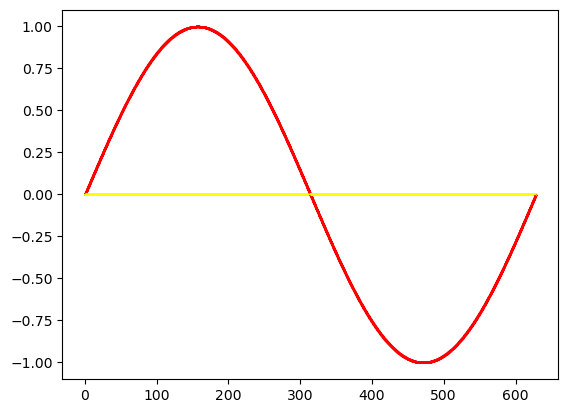

In [152]:

from scipy.linalg import expm
import numpy as np
def exp_a(x,a):
    exp_x = expm(1j*a*x)
    return exp_x
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
def mean1(x,y,z):
    sigma_x = np.array([[0,1],[1,0]])
    sigma_y = np.array([[0,-1j],[1j,0]])
    sigma_z = np.array([[1,0],[0,-1]])   
    tel = [sigma_x,sigma_y,sigma_z]
    p = tel[x]
    q = tel[y]
    v = exp_a(p,0.5*z)@[1,0]
    mean = ((v.conj().T)@q)@v
    return mean
import matplotlib.pyplot as plt
for i in range(20000):
    output = mean1(0,1,0.0001*i*np.pi)
    plt.plot(0.01*i*np.pi,output,marker=".",markersize=0.5,color="red")
    output = mean1(1,1,0.0001*i*np.pi)
    plt.plot(0.01*i*np.pi,output,marker=".",markersize=0.5,color="yellow")


输出图像\
\
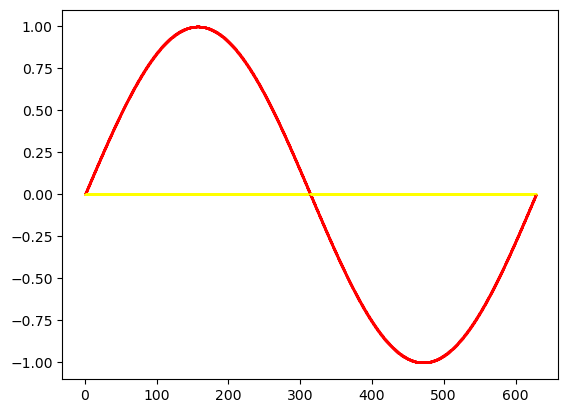

### 2-4 张量积

理解矩阵张量积的含义，$X\otimes I\otimes I\otimes Z$ 可简记为 $X_0Z_3$。
程序生成如下矩阵（输入 n）：

$$H = \sum_{i=0}^{n-1} Z_i\otimes I_{n-i-1} + \sum_{i=0}^{n-2} X_iX_{i+1}\otimes I_{n-i-2} ,$$

并求该矩阵 $H$ 在向量 $(1,0,0,....)$ 下的期望值。

In [162]:
import numpy as np
sigma_x = np.array([[0,1],[1,0]])
def creat_H(n):    
    I = np.eye(2)
    sigma_z = np.array([[1, 0], [0, -1]])
    H1_new = np.zeros((2**n, 2**n))
    for i in range(1,n):
        H1 = I
        for j in range(i-1):
            H1 = np.kron(H1, I)
        H1 = np.kron(H1,sigma_z)
        for k in range(n - i - 1):
            H1 = np.kron(H1, I)
        H1_new = H1_new + H1
    H1 = sigma_z
    for j in range(n-1):
        H1 = np.kron(H1,I)
    H1_new = H1 + H1_new
    for i in range(1,n-1): 
        H2_new = np.zeros((2**n, 2**n))
        H2 =  I       
        for j in range(i - 1):
            H2 = np.kron(H2, I)
        H2 = np.kron(H2,sigma_x)
        H2 = np.kron(H2,sigma_x)
        for j in range(n - i - 2):
            H2 = np.kron(H2,I) 
        H2_new = H2_new + H2
    H2 = np.kron(sigma_x,sigma_x)
    for j in range(n-2):
        H2 = np.kron(H2,I)
    H2_new = H2 + H2_new
    H = H1_new + H2_new
    v = np.zeros(2**n)
    v[0] = 1
    mean = ((v.conj().T)@H)@v
    return H,mean
creat_H(5)




(array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  3.,  1., ...,  0.,  0.,  0.],
        [ 0.,  1.,  3., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., -3.,  1.,  0.],
        [ 0.,  0.,  0., ...,  1., -3.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., -5.]]),
 5.0)

### 2-5 狄拉克符号

记列向量 $\vert 0\rangle = \begin{pmatrix}1\\0 \end{pmatrix}$, $\vert 1\rangle = \begin{pmatrix}0\\1 \end{pmatrix}$, $\vert 00\rangle = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix}$，尝试用 Dirac 符号的语言，重写上述小节涉及的矩阵关系和定义式。并写出 $\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)$ 代表的列向量。

In [7]:
import numpy as np
a1 = np.zeros((1,8))
a1[0,2] = 1
a2 = np.zeros((1,8))
a2[0,5] = 1
a = np.sqrt(2)*(a1 - a2)
a

array([[ 0.        ,  0.        ,  1.41421356,  0.        ,  0.        ,
        -1.41421356,  0.        ,  0.        ]])

### 2-6 使用Tensorcircuit后端

使用`Tensorcircuit`的`Tensorflow`或`JAX`后端API重写本小节（§2）所有题目

提示：可以使用调用后端`K = tc.set_backend("tensorflow")`，具体使用方法可以参考 1-环境配置 与[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)

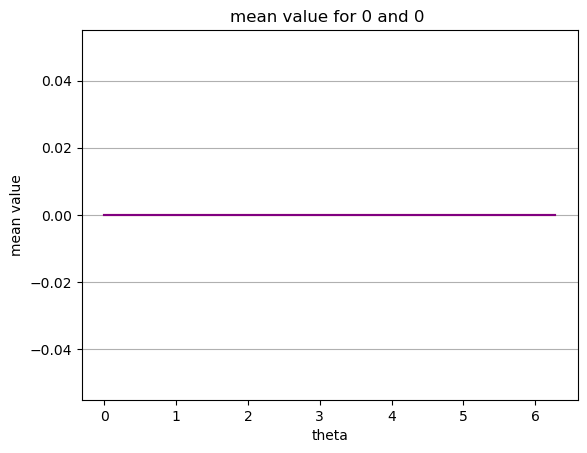

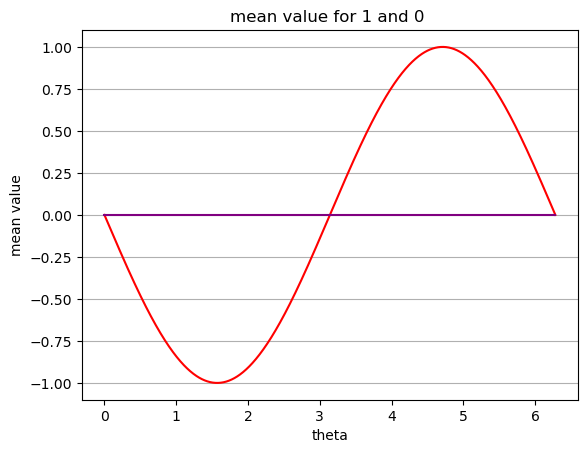

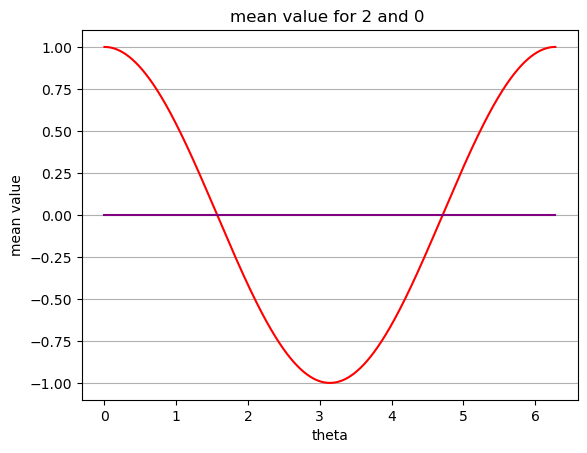

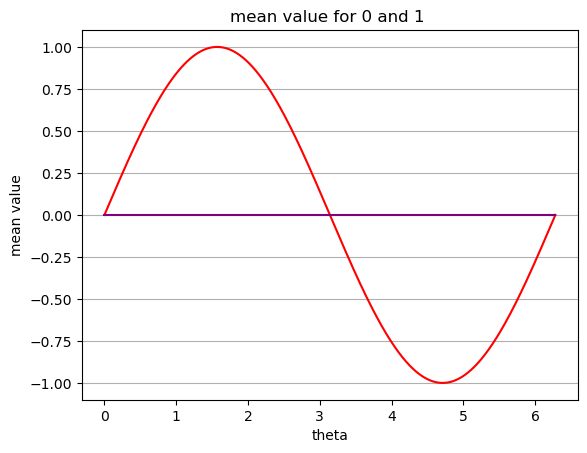

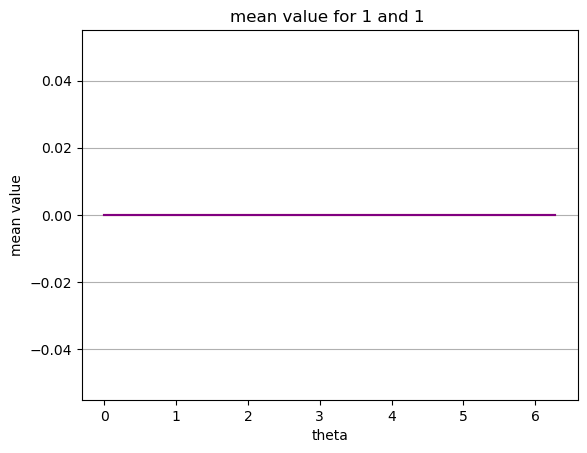

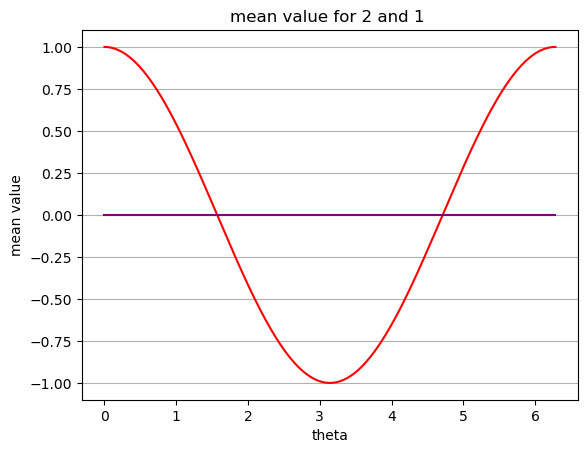

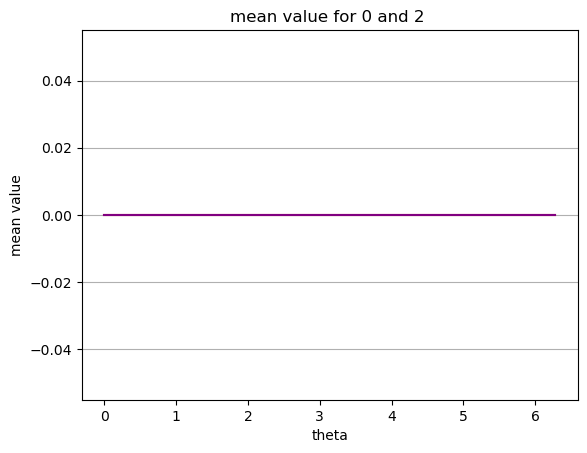

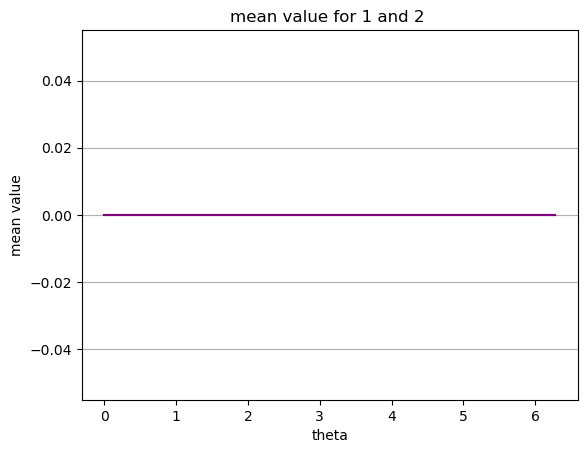

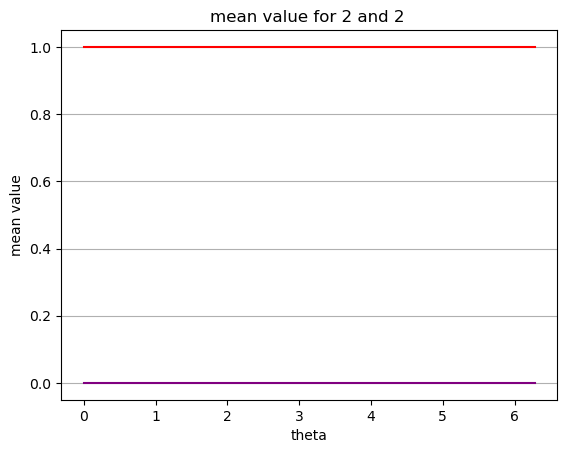

In [157]:
import tensorcircuit as tc
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy
K = tc.set_backend("tensorflow")
def mean2(x,y,z):
    sigma_x = np.array([[0,1],[1,0]],dtype="complex")
    sigma_y = np.array([[0,-1j],[1j,0]],dtype="complex")
    sigma_z = np.array([[1,0],[0,-1]],dtype="complex")
    tel = [sigma_x,sigma_y,sigma_z]
    p = tc.array_to_tensor(tel[x],dtype="complex128")
    q = tc.array_to_tensor(tel[y],dtype="complex128")
    v0 = tc.array_to_tensor(np.array([1,0],dtype="float"),dtype="complex128")
    v = np.matmul((K.expm(z/2j*p)),v0)
    mean_tc = np.matmul(np.matmul(v.conj().T,q),v)
    return mean_tc
for j in range(3):
    for i in range(3):
        thetas = np.linspace(0,2*np.pi,1000)
        output = [mean2(j,i,theta) for theta in thetas]
        plt.plot(thetas,np.real(output),color="red")
        plt.plot(thetas,np.imag(output),color="purple")
        plt.xlabel("theta")
        plt.ylabel("mean value")
        plt.grid(True,which="both",axis="y")
        plt.title(f"mean value for {i} and {j} ")
        plt.show()

## 3 导数与梯度下降

### 3-1 数值微分

给定任意计算机函数 ``f``， 其输出是一个数值，输入是一个向量，实现一个函数来计算 ``f`` 关于输入向量各分量的导数。这里可以采用数值差分的方式近似实现，也即 $$(f(x+\delta)-f(x))/\delta$$

<function matplotlib.pyplot.show(close=None, block=None)>

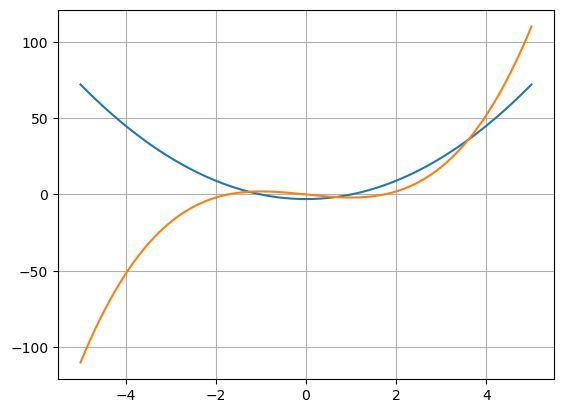

In [158]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt
K = tc.set_backend("tensorflow")
def f(x:tf.Tensor)->tf.Tensor:
    return x**3-3*x
der = K.grad(f)
i = np.linspace(-5,5,2000)
dydx_f = der(K.convert_to_tensor(i))
plt.plot(K.convert_to_tensor(i),dydx_f,"-")
plt.plot(K.convert_to_tensor(i),f(K.convert_to_tensor(i)),"-")
plt.grid(True)
plt.show



### 3-2 三角函数数值微分

若上述黑盒函数 $f=A\sin(x + B)+C$，通过解析推导找到是否存在严格的数值差分和解析导数相同，也即 $$f'(x) = (f(x+\delta)-f(x-\delta))/\tau$$ 对应的 $\delta, \tau$， 这一方法被称为参数平移。

In [ ]:
t = 2*np.sin(delta)

### 3-3 单比特参数平移

若 $f= \langle 0\vert e^{-i\theta/2\hat{P_1}}P_2e^{i\theta/2\hat{P_1}}\vert 0\rangle$，其中$\hat{P_1}, \hat{P_2}$均为泡利矩阵。尝试用数值微分或参数平移的办法估算 f 对 $\theta$ 的导数。此时参数平移法给出的导数是否正确，为什么？

$f(\theta)$ 是否有周期性？请通过数值观察和理论推导，给出 $f(\theta)$ 化简的解析表达式。

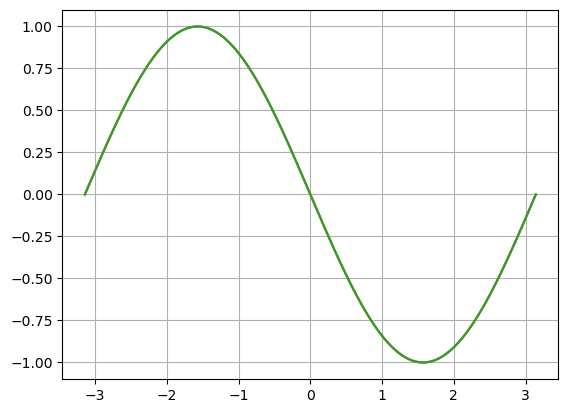

In [230]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
import scipy.linalg as scl
import matplotlib.pyplot as plt
K = tc.set_backend("tensorflow")
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])   
a = [sigma_x,sigma_y,sigma_z]
for i in range(3):
    p = a[1]
    q = a[i]    
    def g(theta):
        y = scl.expm(-0.5*theta*1j*sigma_y)@sigma_x@scl.expm(0.5*theta*1j*sigma_y)
        return np.real(y[0,0])
    num = 1000
    output_g = [g(i) for i in np.linspace(-np.pi,np.pi,num)]
    grad_g = 
    plt.plot(np.linspace(-np.pi,np.pi,num),output_g,"-")
    plt.grid(True)
    plt.show

d:\anaconda\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


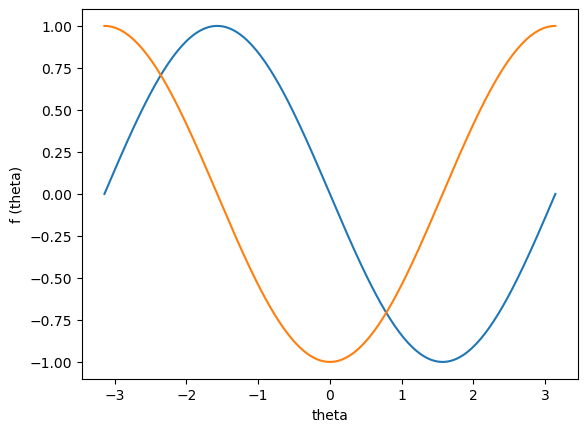

In [2]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
import scipy.linalg as scl
import matplotlib.pyplot as plt
K = tc.set_backend("tensorflow")
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])   
def g(theta:tf.Tensor)->tf.Tensor:
    y = tf.linalg.expm(-theta/2j*sigma_x)@sigma_y@tf.linalg.expm(theta/2j*sigma_x)
    return y[0,0]
grad_g = tc.backend.jit(K.grad(g))
input_g = np.linspace(-np.pi,np.pi,200)
output_g_list = []
dydx_g_list= []
for i in input_g:
    j = K.cast(K.convert_to_tensor(i),dtype=tf.complex128)
    output_g = g(j)
    output_g_list.append(output_g)
    dydx_g = grad_g(j)
    dydx_g_list.append(dydx_g)
plt.plot(input_g,output_g_list,"-")
plt.plot(input_g,dydx_g_list,"-")
plt.xlabel("theta")
plt.ylabel("f (theta)")
plt.show()




输出的$f(\theta)$及其导数
\
\
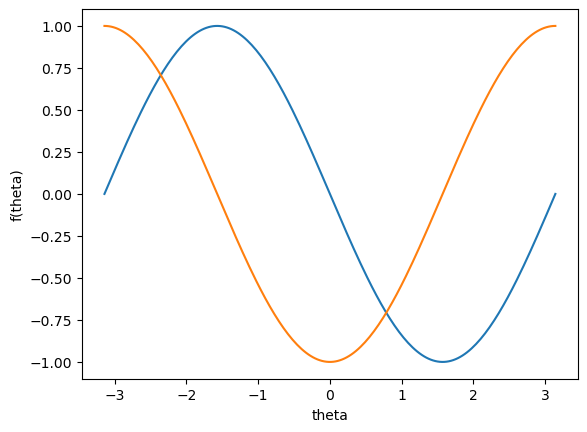

### 3-4 梯度下降

梯度下降是优化函数的常见方法。利用前边我们已知的导数求解方案，结合梯度下降的循环并对1.1给出的代码分析，尝试编程（使用`Tensorflow`后端）寻找 1.3.3 中函数 $f$ 的最小值。

In [91]:
 import tensorflow as tf
import numpy as np
import tensorcircuit as tc
K = tc.set_backend("tensorflow")
sigma_x = K.convert_to_tensor([[0+0j,1+0j],[1+0j,0+0j]])
sigma_y = K.convert_to_tensor([[0+0j,-1j],[1j,0+0j]])
sigma_z = K.convert_to_tensor([[1+0j,0+0j],[0+0j,-1+0j]])   
def g(theta:tf.Tensor)->tf.Tensor:
    y = K.expm(-theta/2j*sigma_x)@sigma_y@K.expm(theta/2j*sigma_x)
    return y[0,0]
grad_g = tc.backend.jit(K.grad(g))
g_new = tc.backend.jit(g)
weight = K.cast(tc.backend.implicit_randn(),dtype=tf.complex128)
opt = tc.backend.optimizer(tf.keras.optimizers.Adam(1e-2))
maxstep = 1000
for i in range(maxstep):
    g_value = g_new(weight)
    grad_g_value = grad_g(weight)
    weight = opt.update(grad_g_value,weight)
    if i % 100 == 0 or i == maxstep - 1:
        print("optimized value after %s round: " % i, g_value,grad_g_value)
print(weight,g_value)




optimized value after 0 round:  tf.Tensor((-0.008611246806453154+0j), shape=(), dtype=complex128) tf.Tensor([0.99996292+0.j], shape=(1,), dtype=complex128)
optimized value after 100 round:  tf.Tensor((-0.8051194564988664+0j), shape=(), dtype=complex128) tf.Tensor([0.59311269+0.j], shape=(1,), dtype=complex128)
optimized value after 200 round:  tf.Tensor((-0.9905228137797488+0j), shape=(), dtype=complex128) tf.Tensor([0.1373483+0.j], shape=(1,), dtype=complex128)
optimized value after 300 round:  tf.Tensor((-0.9998819528746364+0j), shape=(), dtype=complex128) tf.Tensor([0.01536491+0.j], shape=(1,), dtype=complex128)
optimized value after 400 round:  tf.Tensor((-0.9999996483761148+0j), shape=(), dtype=complex128) tf.Tensor([0.0008386+0.j], shape=(1,), dtype=complex128)
optimized value after 500 round:  tf.Tensor((-0.9999999998287527+0j), shape=(), dtype=complex128) tf.Tensor([1.8506607e-05+0.j], shape=(1,), dtype=complex128)
optimized value after 600 round:  tf.Tensor((-0.999999999999997

In [33]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
K = tc.set_backend("tensorflow")
sigma_x = K.convert_to_tensor([[0+0j,1+0j],[1+0j,0+0j]])
sigma_y = K.convert_to_tensor([[0+0j,-1j],[1j,0+0j]])
sigma_z = K.convert_to_tensor([[1+0j,0+0j],[0+0j,-1+0j]])   
def g(theta:tf.Tensor)->tf.Tensor:
    y = K.expm(-theta/2j*sigma_x)@sigma_y@K.expm(theta/2j*sigma_x)
    return y[0,0]
grad_g = tc.backend.jit(K.grad(g))
g_new = tc.backend.jit(g)
weight = tc.array_to_tensor(np.array([1.5]),dtype=tf.complex128)
opt = tc.backend.optimizer(tf.keras.optimizers.Adam(1e-2))
maxstep = 1000
for i in range(maxstep):
    g_value = g_new(weight)
    grad_g_value = grad_g(weight)
    weight = opt.update(grad_g_value,weight)
    if i % 100 == 0 or i == maxstep - 1:
        print("optimized value after %s round: " % i, g_value,grad_g_value)
print(weight,g_value)




optimized value after 0 round:  tf.Tensor((-0.9974949866040543+0j), shape=(), dtype=complex128) tf.Tensor([-0.0707372+0.j], shape=(1,), dtype=complex128)
optimized value after 100 round:  tf.Tensor((-0.9999999711070974+0j), shape=(), dtype=complex128) tf.Tensor([0.00024039+0.j], shape=(1,), dtype=complex128)
optimized value after 200 round:  tf.Tensor((-0.9999999999986862+0j), shape=(), dtype=complex128) tf.Tensor([1.62103547e-06+0.j], shape=(1,), dtype=complex128)
optimized value after 300 round:  tf.Tensor((-1+0j), shape=(), dtype=complex128) tf.Tensor([-1.00270015e-08+0.j], shape=(1,), dtype=complex128)
optimized value after 400 round:  tf.Tensor((-1+0j), shape=(), dtype=complex128) tf.Tensor([-3.55785401e-11+0.j], shape=(1,), dtype=complex128)
optimized value after 500 round:  tf.Tensor((-1+0j), shape=(), dtype=complex128) tf.Tensor([-7.55229213e-14+0.j], shape=(1,), dtype=complex128)
optimized value after 600 round:  tf.Tensor((-1.0000000000000002+0j), shape=(), dtype=complex128) 

## 4 测量

### 4-1 线路期望计算

给定以下线路，试利用 TensorCircuit API 计算其期望 $\langle Z_0Z_1 \rangle$。

In [39]:
import tensorcircuit as tc
import tensorflow as tf
import numpy as np
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.draw(output="mpl")
print(c.state())
print(c.expectation([tc.gates.z(), [0]], [tc.gates.z(), [1]]))
print(c.measure(0, 1, with_prob=True))


[0.70710677+0.j 0.        +0.j 0.        +0.j 0.70710677+0.j]
(0.99999994+0j)
(array([0., 0.], dtype=float32), 0.4999999701976776)


### 4-2 基于测量结果近似期望

利用 TensorCircuit API 对以上线路进行若干次测量，得到一些 0 1 的比特串的结果，并尝试利用这些测量的 bitstring 来估计期望 $\langle Z_0Z_1 \rangle$。

In [96]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
output_list = []
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.draw(output="mpl")
maxstep = 10
for i in range(maxstep):
    a = c.sample()
    b = a[0]
    e = b[0]
    output_list.append(e)
d = output_list.count(1.0)
posibility_11 = d/maxstep
print(posibility_11)



0.6


### 4-3 测量不确定度

上一小问基于测量结果的期望估计和 4-1 的严格结果有一定差异，请分析这一差异随测量次数的标度规律。

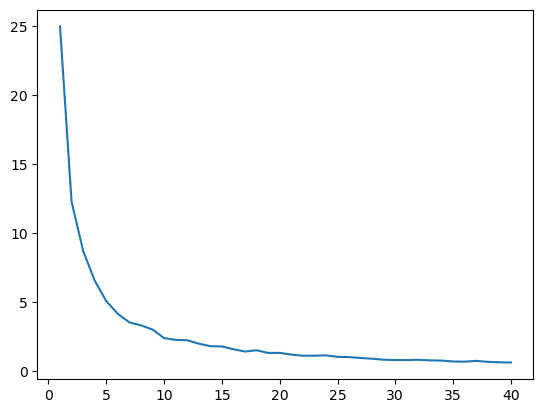

In [265]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
def loss_mean(k):
    output_list = []
    maxstep = k
    for i in range(maxstep):
        a = c.sample()
        b = a[0]
        e = b[0]
        output_list.append(e)
    d = output_list.count(1.0)
    posibility_11 = d/maxstep
    return posibility_11-0.5
def loss_mean_expectation(k):
    loss_sum = 0
    for i in range(1000):
        loss_sum = (loss_mean(k)*10)**2 + loss_sum
    return loss_sum/1000
input_loss = range(1,41)
output_loss = [loss_mean_expectation(i) for i in input_loss]
plt.plot(input_loss,output_loss,"-")

方差值被放大为100倍\
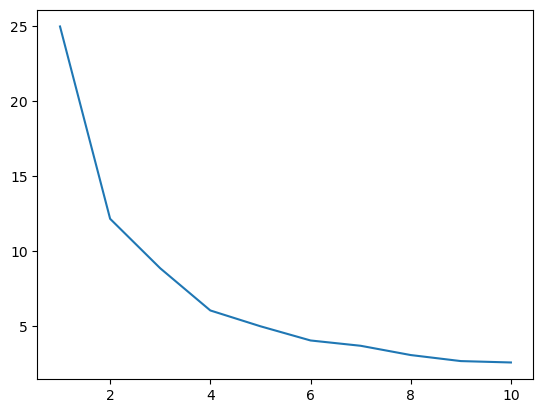\
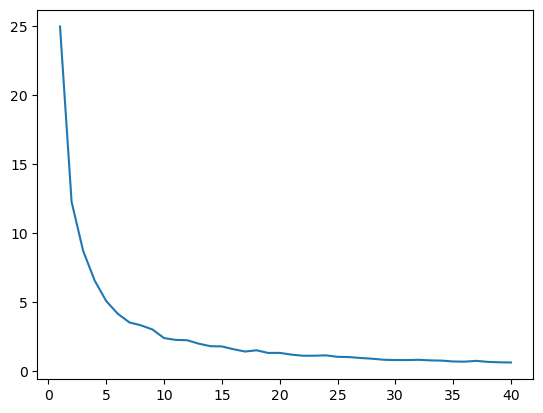\
推测为$s^2=0.25/n$,n为测量次数，即$\sigma = \frac{0.5}{\sqrt{n} } $

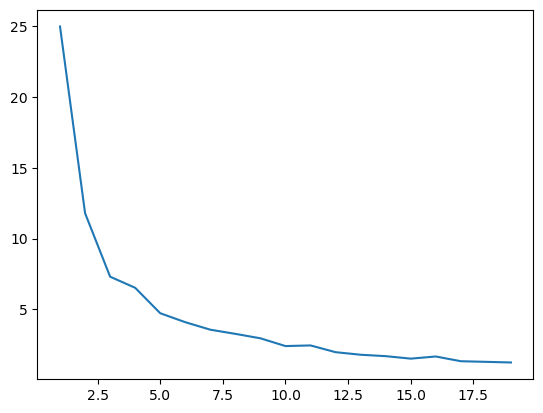

In [262]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
def loss_mean(k):
    output_list = []
    maxstep = k
    for i in range(maxstep):
        a = c.sample()
        b = a[0]
        e = b[0]
        output_list.append(e)
    d = output_list.count(1.0)
    posibility_11 = d/maxstep
    return posibility_11-0.5
def loss_mean_average(k):
    loss_list = []
    for i in range(500):
        loss_list.append((loss_mean(k)*10)**2)
    return sum(loss_list)/500

input_loss = range(1,20)
output_loss = [loss_mean_average(i) for i in input_loss]
plt.plot(input_loss,output_loss,"-")

a posible output(the value is enlarged 100times)\
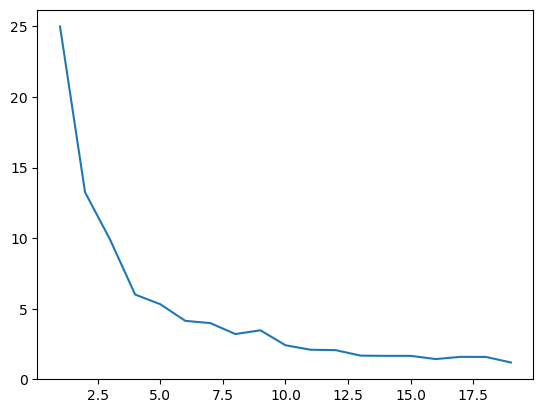
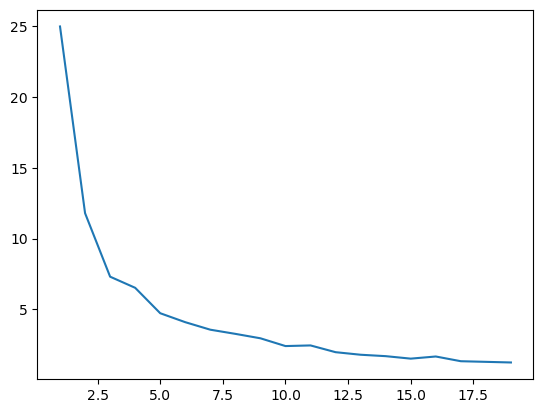\
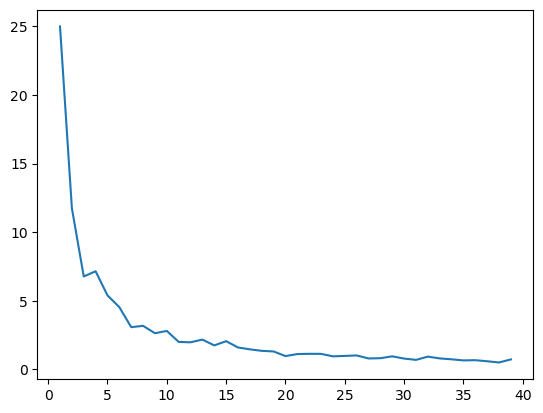

<function matplotlib.pyplot.show(close=None, block=None)>

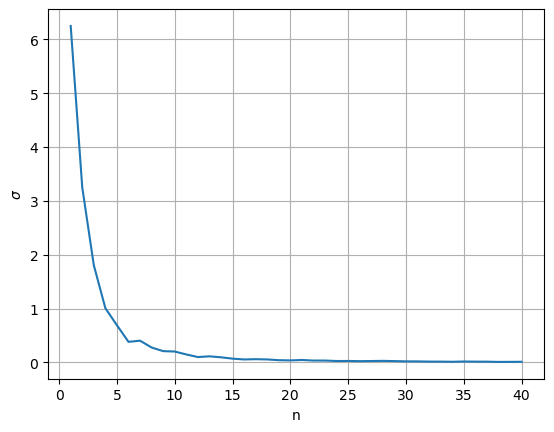

In [136]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt
K = tc.set_backend("tensorflow")
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
def loss(k):
    maxstep = k
    list_of_all = c.sample(maxstep,True)
    list_output = [list_of_all[i][0][0] for i in range(maxstep)]
    expectation = K.sum(list_output)/maxstep
    loss = (expectation-0.5)**2
    return loss
def loss_mean_new(k):
    loss_list = []
    for i in range(500):
        loss_list.append((loss(k)*10)**2)
    return K.sum(loss_list)/500
maxstep = 40
input_ = np.arange(1,maxstep+1)
output_ =[loss_mean_new(i) for i in input_]
plt.plot(input_,output_,"-")
plt.grid(True)
plt.xlabel("n")
plt.ylabel("$\sigma$")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

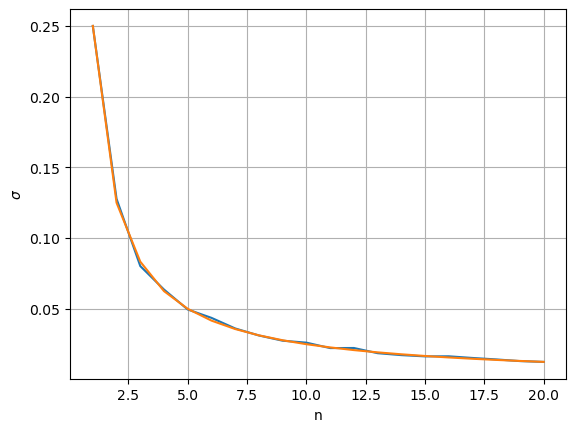

In [23]:
import tensorflow as tf
import numpy as np
import tensorcircuit as tc
import matplotlib.pyplot as plt
def split_list(lst, chunk_size):
    return [lst[i:i + chunk_size] for i in range(0, len(lst), chunk_size)]
K = tc.set_backend("tensorflow")
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
def loss(k):
    maxstep = k*2000
    list_of_all = c.sample(maxstep,True)
    list_output_all = [list_of_all[i][0][0] for i in range(maxstep)]
    result = split_list(list_output_all,k)
    loss = 0
    for i in range(1000):
        expectation = K.sum(result[i])/k
        loss = (expectation-0.5)**2 + loss
    loss = loss/1000
    return loss
maxstep = 20
input_ = np.arange(1,maxstep+1)
output_ =[loss(i) for i in input_]
output_theory = [0.25/i for i in input_]
plt.plot(input_,output_,"-")
plt.plot(input_,output_theory,"-")
plt.grid(True)
plt.xlabel("n")
plt.ylabel("$\sigma$")
plt.show

        

## OPT-1 选做 Grover Search

Grover search 是利用量子计算机来搜索无结构问题解的平方加速方案。

**注意：** 对于该线路，由于线路深度较深且存在多比特门，我们推荐以下设置来运行模拟。

In [ ]:
import cotengra

opt = cotengra.ReusableHyperOptimizer(
    methods=["greedy", "kahypar"],
    parallel="ray",
    minimize="combo",
    max_time=12,
    max_repeats=1024,
    progbar=True,
)
tc.set_contractor("custom", optimizer=opt, contraction_info=True, preprocessing=True)

### OPT-1-1 问题oracle

考虑一个 $3*2$ 的简单格子，每个方格需要填写 0 或 1，使得相邻方格的数字不同，构造该问题的量子线路 oracle，使得输入 6 位比特串，在满足条件时，目标比特输出 1，允许使用辅助比特。

### OPT-1-2 Grover算法实现

根据以上问题 oracle ，实现 Grover 搜索线路，并根据公式给出合适的迭代次数进行测量。可视化不同迭代次数对测量得到正确结果概率的影响曲线。

## OPT-2 选做 变分优化算法

### OPT-2-1 求解方程

实现基于 TensorCircuit jax 或 tf 后端的函数，给定输入 $a, b, c, d$ 输出 $ax^3+bx^2+cx+d=0$ 的解，要求基于变分优化梯度下降的方式。

### OPT-2-2 优化点

给定一组点 $(x_i, y_i)$，要求找到坐标系上到所有点的距离和最近的点的坐标并可视化，基于变分优化梯度下降的方式。（多村庄挖井）

### OPT-2-3 优化线

给定一组点 $(x_i, y_i)$，要求找到坐标系上的一条直线到所有点的距离和最小，基于变分优化梯度下降的方式。（多村庄通公路）